In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
def load_cSCC_46(data_dir='/home/hanyuji/Data/sxa_ST_data/cSCC/', P_name='P4', slice_nums=['1','2']):
    slices = []  
    for slice_num in slice_nums:
        slice = sc.read_10x_mtx(data_dir+P_name+'/'+P_name+'_rep'+slice_num)
        position = sc.read_csv(data_dir+P_name+'/'+P_name+'_rep'+slice_num+'/spatial/'+P_name+'_rep'+slice_num+'_tissue_positions_list.csv')
        position = position[slice.obs.index]
        spatial_coor = np.array([row[1:3] for row in position.X.tolist()]).astype(int)
        spatial = np.array([row[3:5] for row in position.X.tolist()]).astype(int)
        slice.obsm['spatial_coor']=spatial_coor
        slice.obsm['spatial'] = spatial
        sc.pp.filter_cells(slice, min_counts = 3)
        slices.append(slice)
    
    combined_adata = ad.concat(
        slices, 
        axis=0, 
        join='outer', 
        merge='unique', 
        uns_merge='unique', 
        label='batch', 
        keys=list(range(1, len(slices)+1)), 
        index_unique='-', 
        fill_value=0
    )

    sc.pp.highly_variable_genes(combined_adata, n_top_genes=3000 ,flavor='seurat_v3')
    combined_adata = combined_adata[:, combined_adata.var.highly_variable]
    # 标准化 log 
    sc.pp.normalize_total(combined_adata, target_sum=1e4)
    sc.pp.log1p(combined_adata)

    return combined_adata

In [3]:
def load_cSCC_25910(data_dir='/home/hanyuji/Data/sxa_ST_data/cSCC/', P_name='P2', slice_nums=['1','2','3']):
    slices = []      
    for slice_num in slice_nums:
        slice = sc.read_text(data_dir+P_name+'/'+P_name+'_ST_rep'+slice_num+'_stdata.tsv')
        position = sc.read_text(data_dir+P_name+'/spot_data-selection-'+P_name+'_ST_rep'+slice_num+'.tsv')
        spatial_coor = np.array([row[:2] for row in position.X.tolist()]).astype(int)
        index = [f'{x}x{y}' for x, y in spatial_coor]
        position.obs.index = index
        index = np.intersect1d(index, slice.obs.index)
        slice = slice[index]
        position = position[index]
        spatial_coor = []
        spatial_coor = np.array([row[:2] for row in position.X.tolist()]).astype(int)
        spatial = np.array([row[4:6] for row in position.X.tolist()]).astype(int)
        slice.obsm['spatial_coor'] = spatial_coor
        slice.obsm['spatial'] = spatial
        sc.pp.filter_cells(slice, min_counts = 3)
        slices.append(slice)
    
    combined_adata = ad.concat(
        slices, 
        axis=0, 
        join='outer', 
        merge='unique', 
        uns_merge='unique', 
        label='batch', 
        keys=list(range(1, len(slices)+1)), 
        index_unique='-', 
        fill_value=0
    )

    sc.pp.highly_variable_genes(combined_adata, n_top_genes=3000 ,flavor='seurat_v3')
    combined_adata = combined_adata[:, combined_adata.var.highly_variable]
    # 标准化 log 
    sc.pp.normalize_total(combined_adata, target_sum=1e4)
    sc.pp.log1p(combined_adata)

    return combined_adata

In [6]:
cscc_2 = load_cSCC_25910(P_name='P2')
cscc_4 =  load_cSCC_46(P_name='P4')
cscc_5 = load_cSCC_25910(P_name='P5')
cscc_6 =  load_cSCC_46(P_name='P6')
cscc_9 = load_cSCC_25910(P_name='P9')
cscc_10 = load_cSCC_25910(P_name='P10')


/tmp/ipykernel_1110546/1987086570.py:15: ImplicitModificationWarning: Setting element `.obsm['spatial_coor']` of view, initializing view as actual.
  slice.obsm['spatial_coor'] = spatial_coor
/tmp/ipykernel_1110546/1987086570.py:15: ImplicitModificationWarning: Setting element `.obsm['spatial_coor']` of view, initializing view as actual.
  slice.obsm['spatial_coor'] = spatial_coor
/tmp/ipykernel_1110546/1987086570.py:15: ImplicitModificationWarning: Setting element `.obsm['spatial_coor']` of view, initializing view as actual.
  slice.obsm['spatial_coor'] = spatial_coor
/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tmp/ipykernel_1110546/1987086570.py:15: I

In [11]:
plt_adata = cscc_10
index = 1

unique_batches = plt_adata.obs['batch'].unique()
adatas = [plt_adata[plt_adata.obs['batch'] == batch].copy() for batch in unique_batches]
adatas

[AnnData object with n_obs × n_vars = 608 × 3000
     obs: 'n_counts', 'batch'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', 'log1p'
     obsm: 'spatial_coor', 'spatial',
 AnnData object with n_obs × n_vars = 621 × 3000
     obs: 'n_counts', 'batch'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', 'log1p'
     obsm: 'spatial_coor', 'spatial',
 AnnData object with n_obs × n_vars = 462 × 3000
     obs: 'n_counts', 'batch'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', 'log1p'
     obsm: 'spatial_coor', 'spatial']

In [ ]:
cscc_2

AnnData object with n_obs × n_vars = 1950 × 3000
    obs: 'n_counts', 'batch'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'spatial_coor', 'spatial'

In [12]:
dataset_dir = '/home/hanyuji/Data/sxa_ST_data/h5ad_BiGATAE/cSCC/'

cscc_2.write(dataset_dir+'cSCC_P2_3slices_646spot_3000gene.h5ad')
cscc_4.write(dataset_dir+'cSCC_P4_2slices_744spot_3000gene.h5ad')
cscc_5.write(dataset_dir+'cSCC_P5_3slices_521spot_3000gene.h5ad')
cscc_6.write(dataset_dir+'cSCC_P6_2slices_3650spot_3000gene.h5ad')
cscc_9.write(dataset_dir+'cSCC_P9_3slices_1145spot_3000gene.h5ad')
cscc_10.write(dataset_dir+'cSCC_P10_3slices_608spot_3000gene.h5ad')


[AnnData object with n_obs × n_vars = 666 × 3000
     obs: 'n_counts', 'batch'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', 'log1p'
     obsm: 'spatial_coor', 'spatial',
 AnnData object with n_obs × n_vars = 646 × 3000
     obs: 'n_counts', 'batch'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', 'log1p'
     obsm: 'spatial_coor', 'spatial',
 AnnData object with n_obs × n_vars = 638 × 3000
     obs: 'n_counts', 'batch'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', 'log1p'
     obsm: 'spatial_coor', 'spatial']

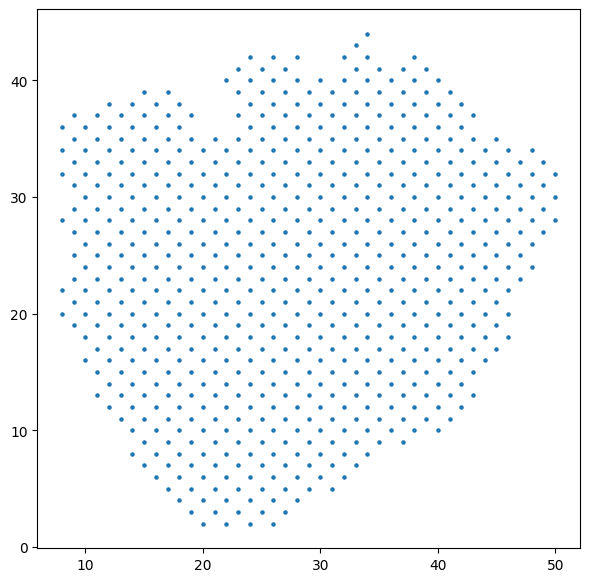

In [29]:
plt_adata = cscc_2
index = 1

unique_batches = plt_adata.obs['batch'].unique()
adatas = [plt_adata[plt_adata.obs['batch'] == batch].copy() for batch in unique_batches]

df = pd.DataFrame(adatas[index].obsm['spatial_coor'])
fig = plt.figure(figsize=(7, 7))
plt.scatter(df[0], df[1],s=5)
adatas